# CodSoft Internship - Data Science Tasks

## Task 1: Titanic Survival Prediction

**Objective**:  
The goal of this task is to build a predictive model using the Titanic dataset to determine whether a passenger survived or not. This is a classic beginner project often used to practice machine learning concepts such as classification and feature engineering.

---

### **Dataset Overview**:

The Titanic dataset contains details of passengers aboard the Titanic, including their survival status. It consists of both **numerical** and **categorical** features that will be used to train the model.

#### **Key Columns**:
1. **PassengerId**: A unique identifier for each passenger.
2. **Pclass**: The class of the passenger's ticket (1st, 2nd, or 3rd).
3. **Name**: Name of the passenger.
4. **Sex**: Gender of the passenger (Male/Female).
5. **Age**: Age of the passenger (some missing values).
6. **SibSp**: Number of siblings or spouses aboard.
7. **Parch**: Number of parents or children aboard.
8. **Ticket**: Ticket number.
9. **Fare**: Fare the passenger paid.
10. **Cabin**: Cabin number (many missing values).
11. **Embarked**: The port where the passenger boarded (C = Cherbourg, Q = Queenstown, S = Southampton).
12. **Survived**: The target variable (1 if the passenger survived, 0 if they did not).

#### **Data Source**:
The dataset can be accessed from Kaggle:
[**Titanic Dataset**](https://www.kaggle.com/datasets/yasserh/titanic-dataset)

---

### **Task Details**:
In this task, we used the Titanic dataset to predict the survival of passengers. I worked through the following steps:
1. **Data Preprocessing**: Cleaned and handled missing data, encoded categorical features, and scaled numerical features.
2. **Feature Engineering**: Created new features or modified existing ones to improve model performance.
3. **Model Building**: Built classification models to predict survival.
4. **Evaluation**: Evaluated model performance using metrics such as accuracy, F1 score, and confusion matrix.

This task provided me with hands-on experience working with real-world data, implementing machine learning algorithms, and understanding model evaluation.




## 1. Import Libraries 📚
- **numpy** & **pandas** for data handling. 📊  
- **matplotlib** & **seaborn** for data visualization. 📈  
- **ML Models** 🤖:  
  - GaussianNB, DecisionTree, KNeighbors, RandomForest, AdaBoost, XGBClassifier, LogisticRegression.  
- **Metrics** 📏:  
  - f1_score to evaluate models.  
- **time** to measure training time. ⏱️

In [60]:
# Import necessary libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import time

## 2. **Load the Dataset 📂**
- Load the Titanic dataset from the provided file path using `pandas`.  
- `df` now contains all the data for analysis.  

**In short**: Dataset is loaded and ready to explore! 🚢✨


In [2]:
df = pd.read_csv(r"C:\Users\mdimr\Downloads\CODSOFT Intern Datasets\Titanic.csv\Titanic-Dataset.csv")


## 3. **Preview the Dataset 🧐**
- Use `df.head()` to view the first few rows of the dataset.
- This helps to get an overview of the data, such as column names and initial entries.  

**In short**: Inspecting the first few rows of the dataset to understand its structure. 🔍👀

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 4. **Dataset Information 📝**
- Use `df.info()` to get a summary of the dataset.
- It shows the number of entries, column names, non-null values, and data types.  
- Useful for understanding missing data and column types.

**In short**: Summary of dataset structure, including data types and missing values. 🛠️📊


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 5. **Check for Missing Values 🚨**
- Use `df.isnull().sum()` to identify missing values in each column.  
- This will give a count of `NaN` or missing entries in every column.

**In short**: Identify which columns have missing data and how much. 🔍💡


In [5]:
# Find missing values in each column
missing_values = df.isnull().sum()

# Display the missing values
print(missing_values)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## 6. **Handle Missing Data 🛠️**

- For numerical columns (`Age`, `Fare`), use forward fill (`ffill`) to propagate the last valid observation.  
- For categorical columns (`Embarked`, `Cabin`), fill missing values with the mode (most frequent value).

**In short**: Missing values are replaced with the most logical alternatives: forward fill for numbers and mode for categories. 🔄✅


In [6]:
# Fill missing values for numerical columns with forward fill (ffill)
df['Age'] = df['Age'].fillna(method='ffill')
df['Fare'] = df['Fare'].fillna(method='ffill')

# Fill missing values for categorical columns with mode (most frequent value)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode()[0])

In [7]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## 7. **Cast Columns to Appropriate Data Types 🔄**

- Convert the `Survived`, `Pclass`, `SibSp`, and `Parch` columns to `object` type (categorical).  
- Convert the `Age` column to `int64` to ensure numerical consistency.

**In short**: Columns are cast to their correct data types to ensure proper analysis and modeling. 🧑‍💻🔢


In [8]:
# Cast columns to appropriate types
df['Survived'] = df['Survived'].astype('object')
df['Pclass'] = df['Pclass'].astype('object')
df['SibSp'] = df['SibSp'].astype('object')
df['Parch'] = df['Parch'].astype('object')

df['Age'] = df['Age'].astype('int64')


## 8. **Analyze Numerical Columns 📊**

- **Function**: `analyze_numerical_columns` computes key statistics like Mean, Median, Variance, Standard Deviation, Kurtosis, and Skewness for numerical columns.
- **Steps**: Identifies numerical columns, calculates statistics, and rounds results for clarity.

**In short**: Key statistics calculated to understand the distribution of numerical data. 📈


In [9]:
import pandas as pd
import numpy as np
from scipy.stats import kurtosis, skew

def analyze_numerical_columns(dataframe, numerical_columns):
    """
    Analyzes specified numerical columns in a DataFrame.
    
    Parameters:
    - dataframe: The DataFrame containing the data.
    - numerical_columns: List of numerical column names to analyze.
    
    Returns:
    - result_df: DataFrame containing the analysis results for each column.
    """
    # Initialize an empty list to store results
    results = []

    for column in numerical_columns:
        # Calculate statistics
        mean = dataframe[column].mean()
        median = dataframe[column].median()
        variance = dataframe[column].var()
        std_dev = dataframe[column].std()
        min_val = dataframe[column].min()
        max_val = dataframe[column].max()
        kurt = kurtosis(dataframe[column], nan_policy='omit')
        skewness = skew(dataframe[column], nan_policy='omit')
        
        
        # Append results for this column
        results.append({
            'Column': column,
            'Mean': mean,
            'Median': median,
            'Variance': variance,
            'Kurtosis': kurt,
            'Skewness': skewness,
            'Standard Deviation': std_dev,
            'Min': min_val,
            'Max': max_val,
            
            
        })

    # Convert results to a DataFrame for better visualization
    result_df = pd.DataFrame(results)
    return result_df



# Specify numerical columns to analyze
numerical_columns = df.select_dtypes(include=[int, float]).columns.tolist()
# Analyze the numerical columns
results_df = analyze_numerical_columns(df, numerical_columns)

results_df = results_df.round(2)

# Display the results
results_df

,Column,Mean,Median,Variance,Kurtosis,Skewness,Standard Deviation,Min,Max
0,PassengerId,446.00,446.00,66231.00,-1.20,0.00,257.35,1.0,891.00
1,Age,29.56,28.00,212.22,0.08,0.32,14.57,0.0,80.00
2,Fare,32.20,14.45,2469.44,33.20,4.78,49.69,0.0,512.33


## 9. **Plot Histograms of Numerical Columns 📊**

- **Objective**: Create histograms for each numerical column to visualize their distributions.
- **Process**:
  - Exclude 'PassengerId' and focus on numerical columns.
  - Set figure size to dynamically adjust based on the number of columns.
  - Use `seaborn.histplot()` to plot histograms with KDE for each numerical column.
  
**In short**: Histograms help visualize the distribution and spread of numerical features. 📈


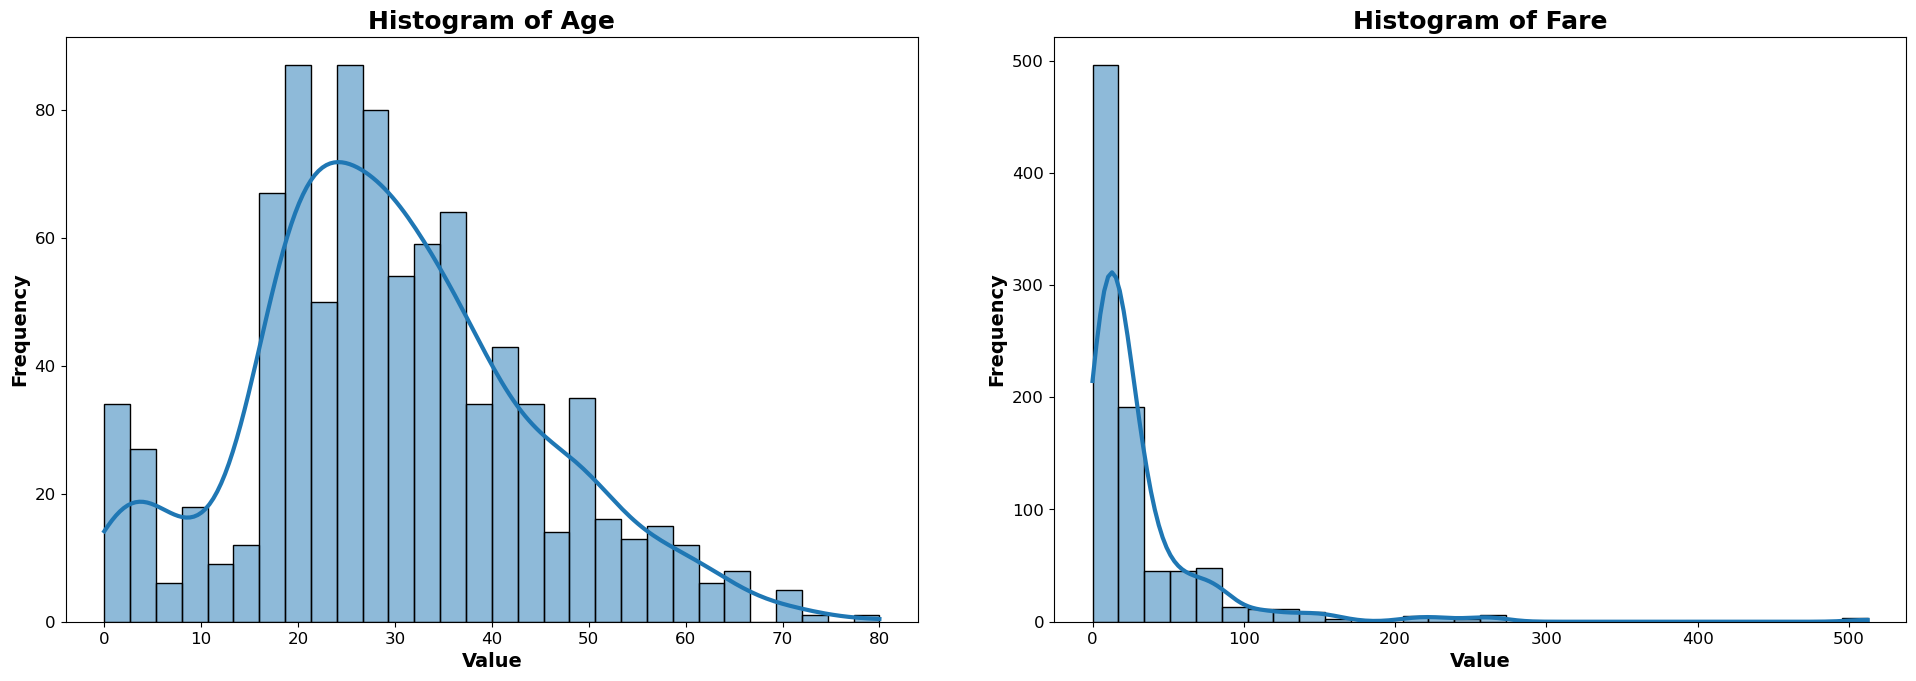

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns of dtype 'float64', excluding 'PassengerId'
numerical_cols = df.select_dtypes(include=['int64','float64']).columns
numerical_cols = [col for col in numerical_cols if col != 'PassengerId']  # Exclude 'PassengerId'

# Set figure size
plt.figure(figsize=(50, len(numerical_cols) * 4))  # Adjust height based on number of columns

# Plot histograms for each numerical column
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 5 + 1, 5, i + 1)
    sns.histplot(df[col], bins=30, kde=True, line_kws={'linewidth': 3})
    plt.title(f'Histogram of {col}', fontsize=18, fontweight='bold')
    plt.xlabel('Value', fontsize=14, fontweight='bold')
    plt.ylabel('Frequency', fontsize=14, fontweight='bold')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

plt.tight_layout(pad=5.0)
plt.show()


## 10. **Plot Boxplots of Numerical Columns 📦**

- **Objective**: Create boxplots for each numerical column to detect outliers and visualize data spread.
- **Process**:
  - Exclude 'PassengerId' and focus on numerical columns.
  - Set the figure size to dynamically adjust based on the number of columns.
  - Use `seaborn.boxplot()` to plot boxplots for each numerical column.
  
**In short**: Boxplots help visualize the spread of data, detect outliers, and understand the central tendency. 📊


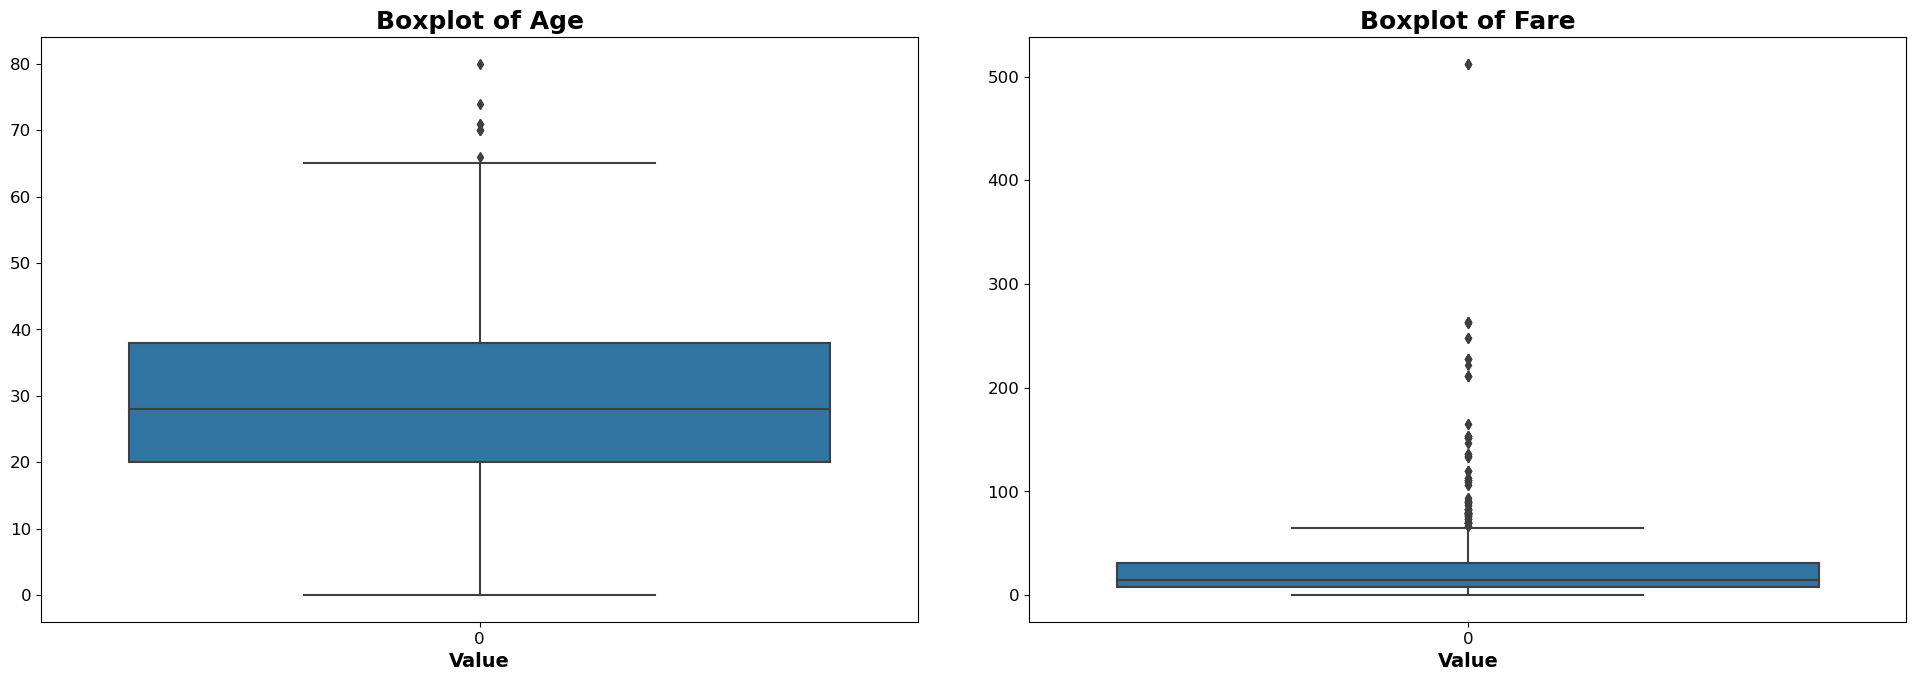

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns of dtype 'float64', excluding 'PassengerId'
numerical_cols = df.select_dtypes(include=['int64','float64']).columns
numerical_cols = [col for col in numerical_cols if col != 'PassengerId']  # Exclude 'PassengerId'

# Set figure size
plt.figure(figsize=(50, len(numerical_cols) * 4))  # Adjust height based on number of columns

# Plot histograms for each numerical column
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 5 + 1, 5, i + 1)
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}', fontsize=18, fontweight='bold')
    plt.xlabel('Value', fontsize=14, fontweight='bold')

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

plt.tight_layout(pad=5.0)
plt.show()


## 11. **Cap Outliers and Plot Boxplots 📉**

- **Objective**: Limit extreme outliers to the 5th and 95th percentiles, then visualize the capped data.
- **Process**:
  - **Cap Outliers**: The `cap_outliers_10_percent` function is used to cap values below the 5th percentile and above the 95th percentile for each numerical column.
  - **Plot Boxplots**: After capping, boxplots are generated for each numerical column to visualize the distribution and check if outliers are properly handled.

**In short**: Capping outliers helps prevent extreme values from distorting analysis, and boxplots give a clear view of the data's distribution. 📊


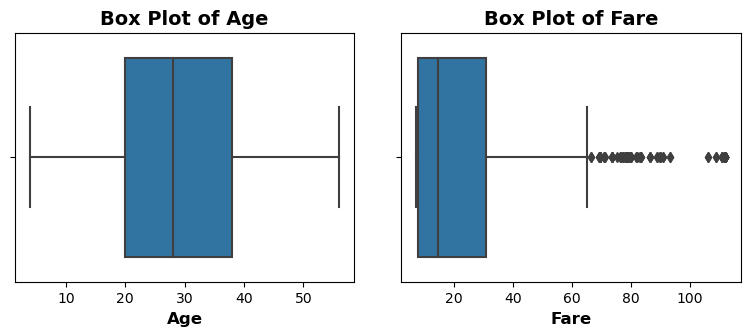

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to cap outliers
def cap_outliers_10_percent(series):
    lower_bound = series.quantile(0.05)  # 5th percentile
    upper_bound = series.quantile(0.95)  # 95th percentile
    capped_series = series.clip(lower=lower_bound, upper=upper_bound)
    return capped_series

# Apply capping to each numerical column
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = [col for col in numerical_cols if col != 'PassengerId']  # Exclude 'PassengerId'

for col in numerical_cols:
    df[col] = cap_outliers_10_percent(df[col])

# Step 2: Create Box Plots for Capped Outliers
num_cols = len(numerical_cols)
rows = (num_cols // 3) + (num_cols % 3 > 0)  # Adjust to fit 3 plots per row

# Set a simple figure size
plt.figure(figsize=(12, rows * 4))  # Compact layout with simpler size

for i, col in enumerate(numerical_cols):
    plt.subplot(rows, 3, i + 1)  # 3 columns per row
    sns.boxplot(x=df[col])
    
    # Set title and labels with adjusted font sizes
    plt.title(f'Box Plot of {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12, fontweight='bold')

    # Adjust tick label sizes
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

plt.tight_layout(pad=3.0)  # Adjust padding for better spacing
plt.show()


## 12. **Analyze Categorical Columns 🔍**

- **Objective**: Analyze categorical columns in the dataset by calculating various statistics like the most frequent value, unique values, and value counts.
- **Process**:
  - **Count**: Number of non-null entries for each column.
  - **Most Frequent Value**: The most common value in the column.
  - **Value Counts**: Frequency of each unique value.
  - **Number of Unique Values**: How many distinct categories are in the column.

**In short**: This analysis helps understand the distribution and diversity of categorical data. 📊


In [14]:
import pandas as pd

def analyze_categorical_columns(dataframe, categorical_columns):
    """
    Analyzes specified categorical columns in a DataFrame.
    
    Parameters:
    - dataframe: The DataFrame containing the data.
    - categorical_columns: List of categorical column names to analyze.
    
    Returns:
    - result_df: DataFrame containing the analysis results for each column.
    """
    # Initialize an empty list to store results
    results = []

    for column in categorical_columns:
        # Count of non-null entries
        count = dataframe[column].count()
        
        # Most frequent value
        most_frequent_value = dataframe[column].mode()[0]  # Mode returns a Series
        
        # Value counts
        value_counts = dataframe[column].value_counts().to_dict()  # Convert to dictionary for easier reading
        
        # Number of unique values
        nunique = dataframe[column].nunique()
        
        # Append results for this column
        results.append({
            'Column': column,
            'Count': count,
            'Most Frequent Value': most_frequent_value,
            'Value Counts': value_counts,
            'Number of Unique Values': nunique
        })

    # Convert results to a DataFrame for better visualization
    result_df = pd.DataFrame(results)
    return result_df


# Specify categorical columns to analyze
categorical_columns = df.select_dtypes(include='object').columns.tolist()

# Analyze the categorical columns
results_df = analyze_categorical_columns(df, categorical_columns)

# Display the results
results_df

,Column,Count,Most Frequent Value,Value Counts,Number of Unique Values
0,Survived,891,0,"{0: 549, 1: 342}",2
1,Pclass,891,3,"{3: 491, 1: 216, 2: 184}",3
2,Name,891,"Abbing, Mr. Anthony","{'Braund, Mr. Owen Harris': 1, 'Boulos, Mr. Ha...",891
3,Sex,891,male,"{'male': 577, 'female': 314}",2
4,SibSp,891,0,"{0: 608, 1: 209, 2: 28, 4: 18, 3: 16, 8: 7, 5: 5}",7
5,Parch,891,0,"{0: 678, 1: 118, 2: 80, 5: 5, 3: 5, 4: 4, 6: 1}",7
6,Ticket,891,1601,"{'347082': 7, 'CA. 2343': 7, '1601': 7, '31012...",681
7,Cabin,891,B96 B98,"{'B96 B98': 691, 'G6': 4, 'C23 C25 C27': 4, 'C...",147
8,Embarked,891,S,"{'S': 646, 'C': 168, 'Q': 77}",3


## 13. **Count Plots for Categorical Variables 📊**

- **Objective**: Visualize the distribution of categorical variables using count plots.
- **Process**:
  - Exclude irrelevant columns like 'Name', 'Ticket', and 'Cabin'.
  - Create count plots for remaining categorical columns.
  - Adjust figure size for readability and proper spacing.

**In short**: Shows the frequency distribution of each categorical variable. 🎨


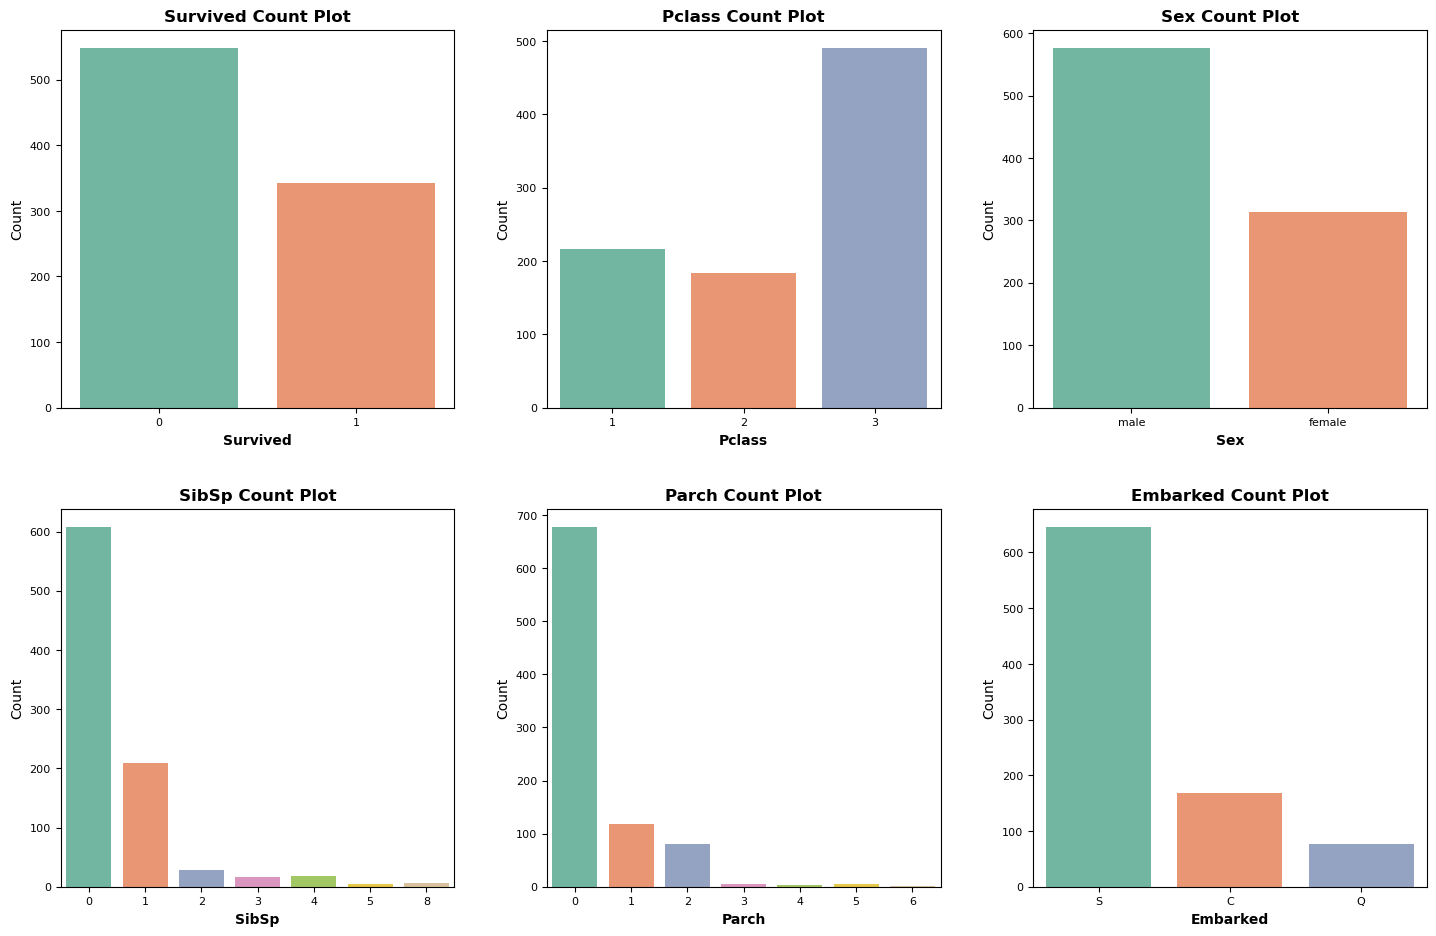

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Categorical columns to consider, excluding 'Name' and 'Ticket'
categorical_cols = df.select_dtypes(include=['category', 'object']).columns
categorical_cols = [col for col in categorical_cols if col not in ['Name', 'Ticket','Cabin']]

# Calculate the required number of rows and columns based on the number of categorical columns
num_cols = len(categorical_cols)
cols = 3  # Number of columns in subplot
rows = (num_cols // cols) + (num_cols % cols > 0)  # Calculate number of rows

# Set figure size for clarity
plt.figure(figsize=(cols * 5, rows * 5))  # Adjust figure size based on the number of columns and rows

# Create count plots for each categorical column
for i, col in enumerate(categorical_cols):
    plt.subplot(rows, cols, i + 1)  # Adjust for dynamic number of rows and columns
    
    # Create the count plot
    sns.countplot(x=df[col], palette="Set2")
    
    # Set title and labels with readable font sizes
    plt.title(f'{col} Count Plot', fontsize=12, fontweight='bold')
    plt.xlabel(col, fontsize=10, fontweight='bold')
    plt.ylabel('Count', fontsize=10)

    # Adjust tick label sizes
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

plt.tight_layout(pad=3.0)  # Space between plots for clarity
plt.show()


## 14. **ANOVA Analysis for Relationship with Survival 🚢💥**

- **Objective**: Determine whether there is a statistically significant relationship between numerical variables and survival status.
- **Process**:
  - Perform ANOVA for each numerical column grouped by the 'Survived' categorical variable (0: Not Survived, 1: Survived).
  - Interpret results based on the p-value:
    - **Strong** relationship: p-value < 0.05
    - **Weak** relationship: p-value < 0.1
    - **No Relationship**: p-value ≥ 0.1

**In short**: Identifies which numerical variables are statistically related to survival. 🧑‍🔬


In [16]:
import pandas as pd
import scipy.stats as stats

# Ensure the categorical variable (Survived) is treated as a category
df['Survived'] = df['Survived'].astype('category')

# Create an empty DataFrame to store results
anova_results = pd.DataFrame(columns=['Variable', 'F-Value', 'p-Value', 'Relationship'])

# Loop through each numerical column to perform ANOVA
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Exclude 'PassengerId' from the list of numerical columns
numerical_cols = [col for col in numerical_cols if col != 'PassengerId']

for num_col in numerical_cols:
    # Create groups based on the 'Survived' variable (0: Not Survived, 1: Survived)
    groups = [group[num_col].dropna() for name, group in df.groupby('Survived')]
    
    # Perform ANOVA
    f_value, p_value = stats.f_oneway(*groups)
    
    # Determine relationship interpretation based on p-values
    if p_value < 0.05:
        relationship = 'Strong'
    elif p_value < 0.1:
        relationship = 'Weak'
    else:
        relationship = 'No Relationship'
    
    # Append results to the DataFrame
    anova_results = anova_results.append({
        'Variable': num_col,
        'F-Value': f_value,
        'p-Value': p_value,
        'Relationship': relationship
    }, ignore_index=True)

# Display the ANOVA results
anova_results


C:\Users\mdimr\AppData\Local\Temp\ipykernel_30108\2691530821.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  anova_results = anova_results.append({
C:\Users\mdimr\AppData\Local\Temp\ipykernel_30108\2691530821.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  anova_results = anova_results.append({


,Variable,F-Value,p-Value,Relationship
0,Age,3.411161,6.508901e-02,Weak
1,Fare,96.400593,1.131576e-21,Strong


## 15. **Box Plot Analysis: Survived vs Numerical Features** 📊

- 📊 **Boxplots** are used to visualize the distribution of numerical features (e.g., Age, Fare) in relation to survival status (0: Not Survived, 1: Survived).
- 👥 Each plot compares the spread of values, showing the median, quartiles, and outliers for survivors and non-survivors.
- 🧑‍🔬 This helps identify if there are noticeable differences in the distribution of numerical features between the two groups (Survived vs Not Survived).


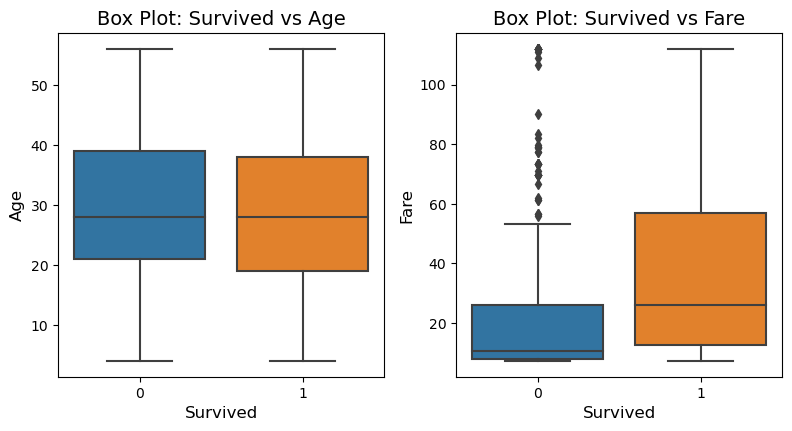

In [17]:
# Step 1: Identify categorical columns
categorical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = [col for col in categorical_cols if col not in ['PassengerId']]
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns excluding 'PassengerId'
numerical_cols = df.select_dtypes(include=[np.number]).columns
numerical_cols = [col for col in numerical_cols if col != 'PassengerId']

# Set up the figure and axes
plt.figure(figsize=(12, 8))

# Create box plots for each numerical column against 'Survived'
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)  # Create subplots with 2 rows and 3 columns
    sns.boxplot(x='Survived', y=col, data=df)
    
    # Set plot titles and labels
    plt.title(f'Box Plot: Survived vs {col}', fontsize=14)
    plt.xlabel('Survived', fontsize=12)
    plt.ylabel(col, fontsize=12)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


## 16. **Chi-Square Test Results: Categorical Features vs Survival Status** 🧪

- 📊 **Objective**: To determine if there is a significant relationship between categorical features and survival status using the **Chi-Square test**.
- 🔢 **Key Elements**:
  - **Chi-Square Statistic**: Measures how expected counts deviate from observed counts.
  - **p-Value**: Determines statistical significance (p < 0.05 suggests a significant relationship).
  - **Degrees of Freedom (DoF)**: Reflects the number of categories considered in the test.
  
The results display whether each categorical feature has a **significant** relationship with survival (True for p-value < 0.05).


In [18]:
import pandas as pd
from scipy.stats import chi2_contingency

# List of categorical columns to check against 'Survived'
categorical_cols = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch','Name','Cabin','Ticket']

# Initialize a list to store the Chi-Square test results
chi_square_results = []

# Loop through each categorical column
for col in categorical_cols:
    # Create a contingency table between the categorical column and 'Survived'
    contingency_table = pd.crosstab(df[col], df['Survived'])
    
    # Perform Chi-Square test
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

    # Append the results to the list
    chi_square_results.append({
        'Variable': col,
        'Chi-Square Statistic': chi2_stat,
        'p-Value': p_value,
        'Degrees of Freedom': dof,
        'Significant Relationship': p_value < 0.05  # Assuming alpha = 0.05
    })

# Create a DataFrame from the Chi-Square results
chi_square_df = pd.DataFrame(chi_square_results)

# Display the resulting DataFrame
chi_square_df


,Variable,Chi-Square Statistic,p-Value,Degrees of Freedom,Significant Relationship
0,Sex,260.717020,1.197357e-58,1,True
1,Embarked,25.964453,2.300863e-06,2,True
2,Pclass,102.888989,4.549252e-23,2,True
3,SibSp,37.271793,1.558581e-06,6,True
4,Parch,27.925784,9.703526e-05,6,True
5,Name,891.000000,4.842482e-01,890,False
6,Cabin,232.753973,6.578739e-06,146,True
7,Ticket,766.569703,1.152730e-02,680,True


## 17. **Survival Proportions by Categorical Features** 📊

- **Objective**: Visualize the proportion of survival for different categories like sex, class, and family size.
- **Process**: Bar plots show survival proportions for each category, with percentages displayed above each bar.
- **Insight**: Helps identify how different categorical features impact survival likelihood.



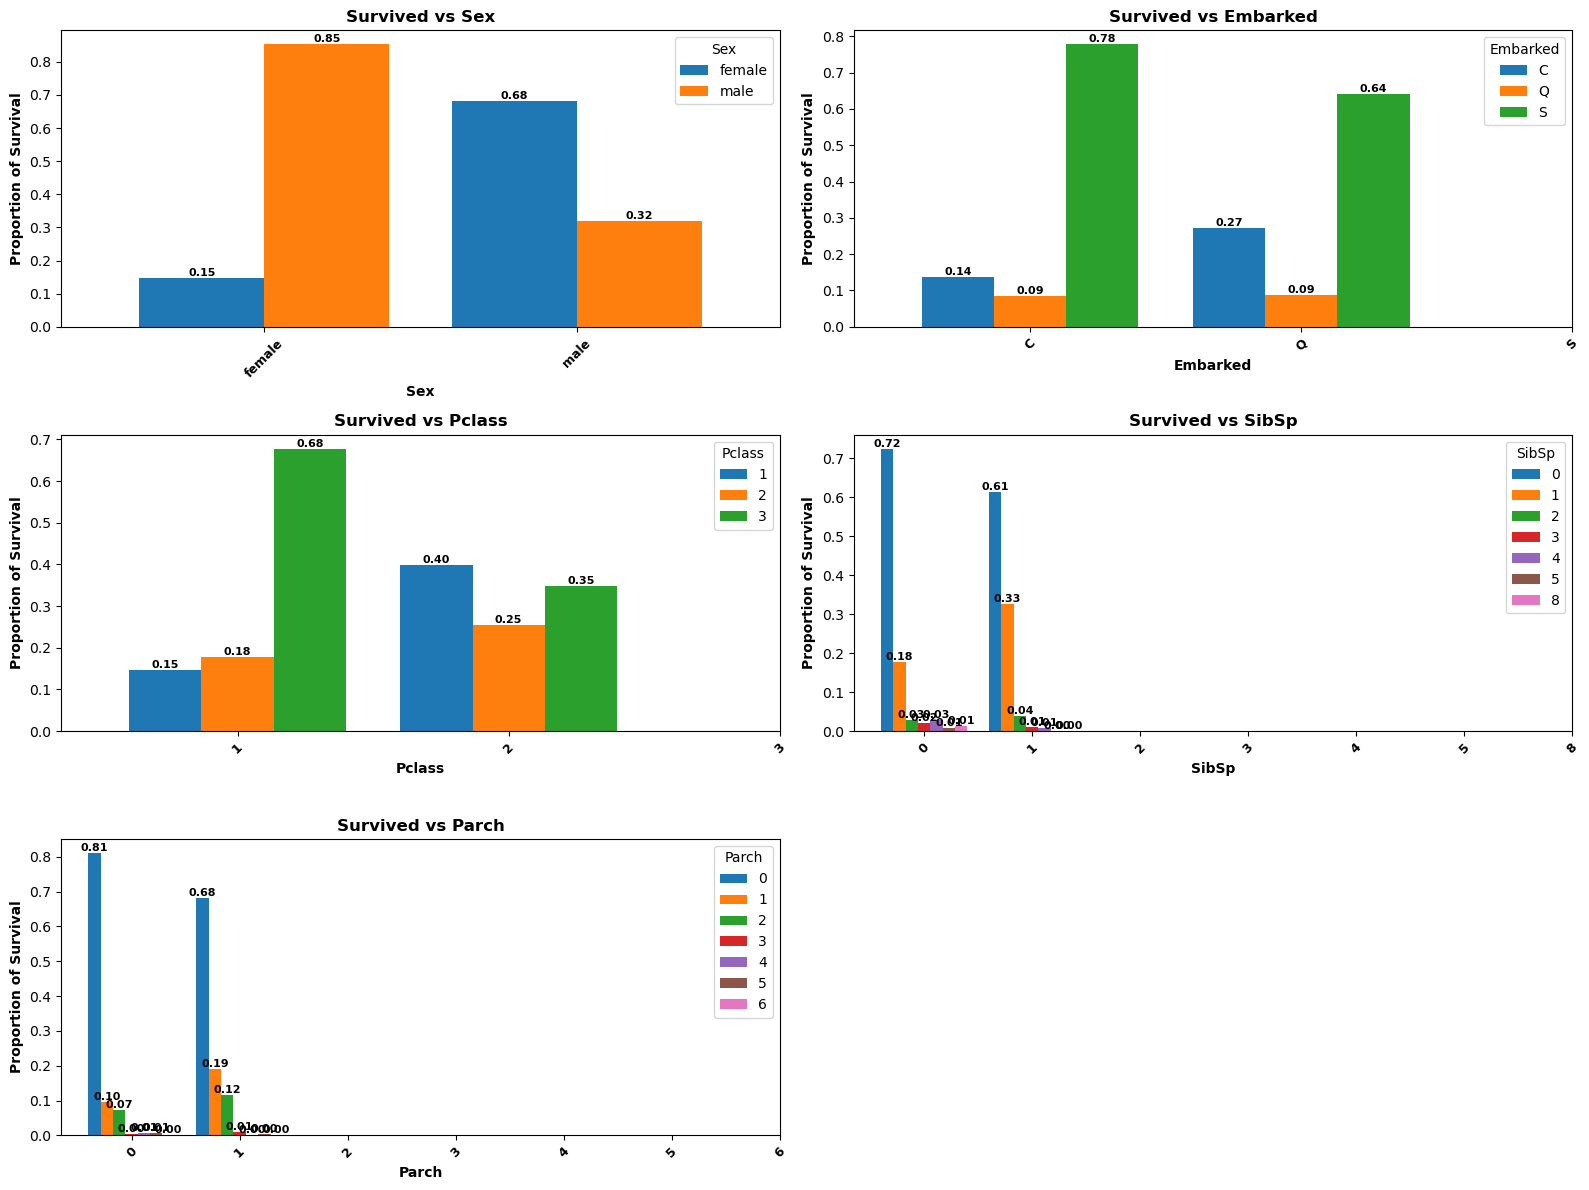

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Columns to analyze
categorical_columns = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']

# Set up the number of rows and columns for the subplots
n_cols = 2
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Calculate the required rows

# Create a figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axes = axes.flatten()  # Flatten to iterate through easily

# Loop through each column and create plots
for idx, column in enumerate(categorical_columns):
    # Create a crosstab between 'Survived' and the current column
    tab = pd.crosstab(df['Survived'], df[column], normalize='index')
    
    # Plotting on the respective subplot axis
    ax = axes[idx]
    tab.plot(kind='bar', ax=ax, width=0.8, legend=True)
    ax.set_title(f'Survived vs {column}', fontsize=12, fontweight='bold')
    ax.set_xlabel(f'{column}', fontsize=10, fontweight='bold')
    ax.set_ylabel('Proportion of Survival', fontsize=10, fontweight='bold')
    ax.tick_params(axis='x', rotation=45)
    
    # Adding percentage and labels above bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}',  # Add proportion above each bar
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=8, fontweight='bold')
    
    # Add category labels below bars
    labels = tab.columns
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels, rotation=45, fontsize=9, fontweight='bold')

# Turn off any extra subplots
for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


## 18. **Defining Predictors and Target Variable** 🎯

- **Predictors (X)**: All columns except `Survived`, `Name`, `Cabin`, and `Ticket` are used as input features for the model.
- **Target (y)**: The `Survived` column is the target variable representing whether a passenger survived (1) or not (0).


In [21]:
# Define the predictors (X) and target variable (y)

X = df.drop(columns=['Survived','Name','Cabin','Ticket'])

y = df['Survived']

## 19. **Data Splitting** 🔄

- **Training Set**: 80% of data for model training.
- **Validation Set**: 10% for model tuning.
- **Test Set**: 10% for final evaluation.

This is done using `train_test_split` with a fixed random seed for reproducibility.


In [22]:
from sklearn.model_selection import train_test_split

# Step 1: Split into 80% train and 20% temporary (test + validation)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.20, random_state=45)

# Step 2: Split the temporary set into 50% test and 50% validation (which is 10% each of the original data)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=45)


print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)


(712, 8) (712,)
(89, 8) (89,)
(90, 8) (90,)


## 20. **Separating Categorical and Numerical Columns** 🧮🔢

- Split training, validation, and test sets into categorical and numerical features for easier processing.


In [23]:
# Separating Categorical and Numerical Columns

X_train_cat = X_train.select_dtypes(include=['object'])
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])


# Separating Categorical and Numerical Columns

X_val_cat = X_val.select_dtypes(include=['object'])
X_val_num = X_val.select_dtypes(include=['int64', 'float64'])


# Separating Categorical and Numerical Columns

X_test_cat = X_test.select_dtypes(include=['object'])
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

## 21. **Rescaling Numerical Features** 🔄📊

- **StandardScaler** is used to scale numerical features in the training, validation, and test sets.
- The transformation standardizes the features to have a mean of 0 and a standard deviation of 1, ensuring comparability.
- The column names are retained after scaling by converting the results back into DataFrames.


In [24]:
# Rescaling numerical features
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)
X_train_num_transformed = pd.DataFrame(std_scaler.fit_transform(X_train_num), 
                                    columns = std_scaler.get_feature_names_out(), 
                                    index = X_train_num.index)

X_train_num_transformed.shape

(712, 3)

In [25]:

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)
X_val_num_transformed = pd.DataFrame(std_scaler.transform(X_val_num), 
                                    columns = std_scaler.get_feature_names_out(), 
                                    index = X_val_num.index)

X_val_num_transformed.shape

(89, 3)

In [26]:

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)
X_test_num_transformed = pd.DataFrame(std_scaler.transform(X_test_num), 
                                    columns = std_scaler.get_feature_names_out(), 
                                    index = X_test_num.index)

X_test_num_transformed.shape

(90, 3)

## 22.  **OneHotEncoding the Categorical Features** 🔠➡️🔢

- **OneHotEncoder** is applied to transform categorical variables into binary (0/1) features, suitable for machine learning models.
- The transformation ensures that each category in a categorical variable is represented by a separate binary column.
- The `handle_unknown="ignore"` ensures that any unseen categories in the validation and test sets are ignored without error.
- **Shapes** of the data before and after transformation are displayed to confirm the increase in the number of columns due to encoding.


In [27]:
# OneHotEncoding the categorical features
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse_output=False, 
                               handle_unknown="ignore")

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)
X_train_cat_tansformed = pd.DataFrame(onehot_encoder.fit_transform(X_train_cat), 
                               columns=onehot_encoder.get_feature_names_out(), 
                               index = X_train_cat.index)

print("Shape of Data before Transformation:", X_train_cat.shape)
print("Shape of Data after Transformation:", X_train_cat_tansformed.shape)

X_train_cat_tansformed.head()

Shape of Data before Transformation: (712, 5)
Shape of Data after Transformation: (712, 22)


,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
332,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
281,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
147,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
405,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [28]:
X_val_cat_tansformed = pd.DataFrame(onehot_encoder.transform(X_val_cat), 
                               columns=onehot_encoder.get_feature_names_out(), 
                               index = X_val_cat.index)

print("Shape of Data before Transformation:", X_val_cat.shape)
print("Shape of Data after Transformation:", X_val_cat_tansformed.shape)

X_val_cat_tansformed.head()

Shape of Data before Transformation: (89, 5)
Shape of Data after Transformation: (89, 22)


,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
780,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
124,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
719,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
358,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
266,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [29]:
X_test_cat_tansformed = pd.DataFrame(onehot_encoder.transform(X_test_cat), 
                               columns=onehot_encoder.get_feature_names_out(), 
                               index = X_test_cat.index)

print("Shape of Data before Transformation:", X_test_cat.shape)
print("Shape of Data after Transformation:", X_test_cat_tansformed.shape)

X_test_cat_tansformed.head()

Shape of Data before Transformation: (90, 5)
Shape of Data after Transformation: (90, 22)


,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
850,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
472,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
248,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
873,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
392,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## 23.  **Combining Transformed Numerical and Categorical Features** ➕🔢

- The **numerical** and **categorical** features are merged (concatenated) into a single dataframe for each of the train, validation, and test sets.
- This combined dataset, `X_train_transformed`, `X_val_transformed`, and `X_test_transformed`, contains both scaled numerical data and one-hot encoded categorical data, ready for modeling.
- The `.head()` function displays the first few rows of the transformed datasets to verify the structure after transformation.


In [30]:
X_train_transformed = pd.concat([X_train_num_transformed, X_train_cat_tansformed], axis=1)

X_train_transformed.head()

,PassengerId,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
332,-0.456760,0.619763,2.836984,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
281,-0.654552,-0.109611,-0.690928,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
147,-1.174242,-1.495422,0.206775,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11,-1.701688,1.932636,-0.058094,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
405,-0.173646,0.328013,-0.245956,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [31]:
X_val_transformed = pd.concat([X_val_num_transformed, X_val_cat_tansformed], axis=1)

X_val_transformed.head()

,PassengerId,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
780,1.280709,-1.203672,-0.712084,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
124,-1.263442,1.786761,1.659321,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
719,1.044134,0.255076,-0.693609,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
358,-0.355925,0.619763,-0.690082,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
266,-0.712727,-0.984860,0.386598,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [32]:
X_test_transformed = pd.concat([X_test_num_transformed, X_test_cat_tansformed], axis=1)

X_test_transformed.head()

,PassengerId,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
850,1.552189,-1.860109,0.101843,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
472,0.086199,0.255076,-0.017475,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
248,-0.782536,0.546826,0.822123,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
873,1.641389,1.276200,-0.652144,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
392,-0.224063,-0.109611,-0.688531,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [33]:
# Import necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import time

## 24.  **Model Dictionary for Classification** 🔧🤖

- A **dictionary of models** is created for various classification algorithms: **Gaussian Naive Bayes**, **Decision Tree**, **K-Nearest Neighbors**, **Random Forest**, **AdaBoost**, and **Logistic Regression**.
- These models are prepared for training and testing on the dataset.
- The `results` dictionary is initialized to store the performance metrics (accuracy, precision, etc.) for each model after evaluation.


In [34]:
# Updated models dictionary (still using GaussianNB instead of MultinomialNB)
models = {
    'Naviebayes':GaussianNB(),
    'DecisionTree': DecisionTreeClassifier(),
    'KNeighbors': KNeighborsClassifier(),
    'RandomForest': RandomForestClassifier(),
    
    'AdaBoost': AdaBoostClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=1000)
}

# Dictionary to store results
results = {}

## 25. **Model Training & Evaluation** 🧑‍💻⏱️

- Each model is trained using the transformed data, and the following are recorded:
  - **Training time** ⏱️
  - **Validation F1 score** 📊
  - **Test F1 score** 📊
  - **Prediction times** for both validation and test sets ⏱️

- Results are stored in a dictionary for easy comparison across models.


In [56]:
# Train and evaluate each model
for model_name, model in models.items():
    print(f"\nTraining Using OneHotEncoder and Standardization.... {model_name}...")
    
    # Train the model and record training time
    start_time = time.time()
    model.fit( X_train_transformed, y_train)
    train_time = time.time() - start_time
    
    # Predict on the validation set and record prediction time
    start_time = time.time()
    y_val_pred = model.predict(X_val_transformed)
    val_time = time.time() - start_time
    
    # Compute validation F1 score
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')
    
    # Predict on the test set and record prediction time
    start_time = time.time()
    y_test_pred = model.predict(X_test_transformed)
    test_time = time.time() - start_time
    
    # Compute test F1 score
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    # Store results
    results[model_name] = {
        'Train Time': train_time,
        'Val Prediction Time': val_time,
        'Val F1 Score': val_f1,
        'Test Prediction Time': test_time,
        'Test F1 Score': test_f1
    }
    
    # Print results for the model
    print(f"{model_name} - Train Time: {train_time:.4f}s, Val F1 Score: {val_f1:.4f}, Test F1 Score: {test_f1:.4f}")


Training Using OneHotEncoder and Standardization.... Naviebayes...
Naviebayes - Train Time: 0.0031s, Val F1 Score: 0.2804, Test F1 Score: 0.1476

Training Using OneHotEncoder and Standardization.... DecisionTree...
DecisionTree - Train Time: 0.0041s, Val F1 Score: 0.8643, Test F1 Score: 0.7430

Training Using OneHotEncoder and Standardization.... KNeighbors...
KNeighbors - Train Time: 0.0020s, Val F1 Score: 0.8178, Test F1 Score: 0.8459

Training Using OneHotEncoder and Standardization.... RandomForest...
RandomForest - Train Time: 0.1897s, Val F1 Score: 0.8851, Test F1 Score: 0.8056

Training Using OneHotEncoder and Standardization.... AdaBoost...
AdaBoost - Train Time: 0.1066s, Val F1 Score: 0.8084, Test F1 Score: 0.8480

Training Using OneHotEncoder and Standardization.... LogisticRegression...
LogisticRegression - Train Time: 0.0179s, Val F1 Score: 0.8405, Test F1 Score: 0.8679


C:\Users\mdimr\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


## 26. **Model Evaluation Plots** 📊

1. **Training Time Comparison** ⏱️:
   - Bar chart comparing the training time for each model.
   
2. **F1 Scores Comparison** 📈:
   - Bar chart showing the validation and test F1 scores for each model.
   
3. **Overfitting/Underfitting Comparison** ⚖️:
   - Line chart comparing the validation and test F1 scores to check for overfitting or underfitting across models.


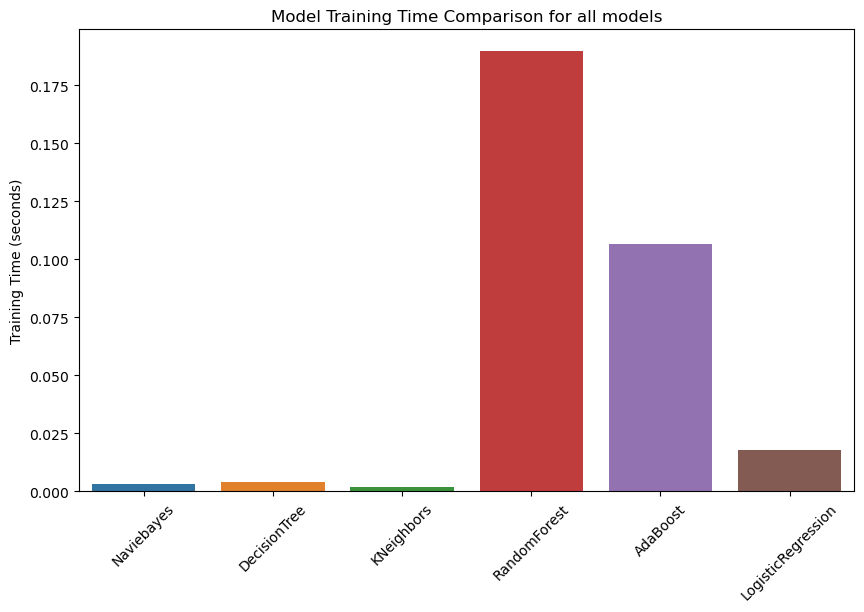

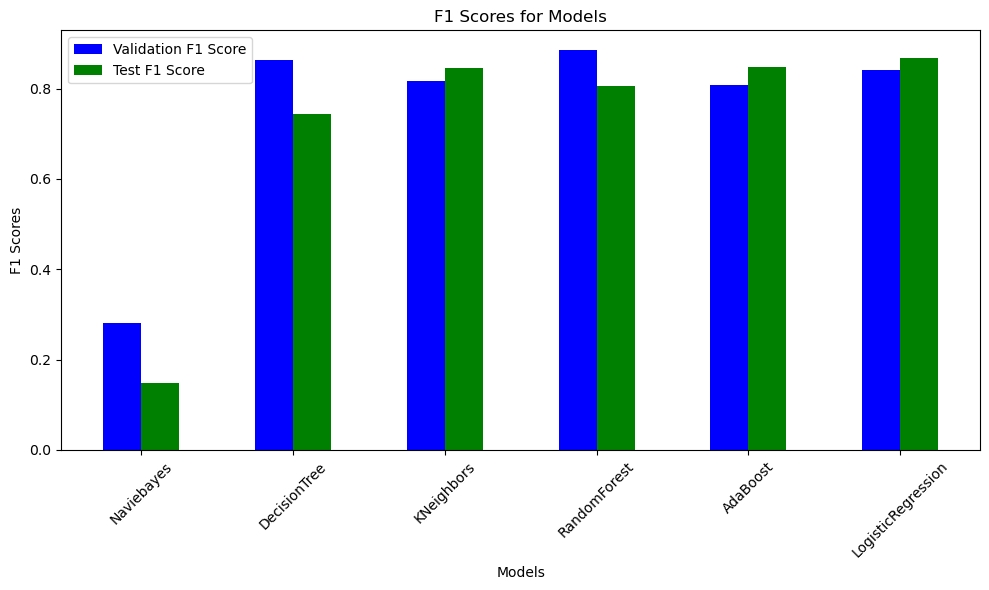

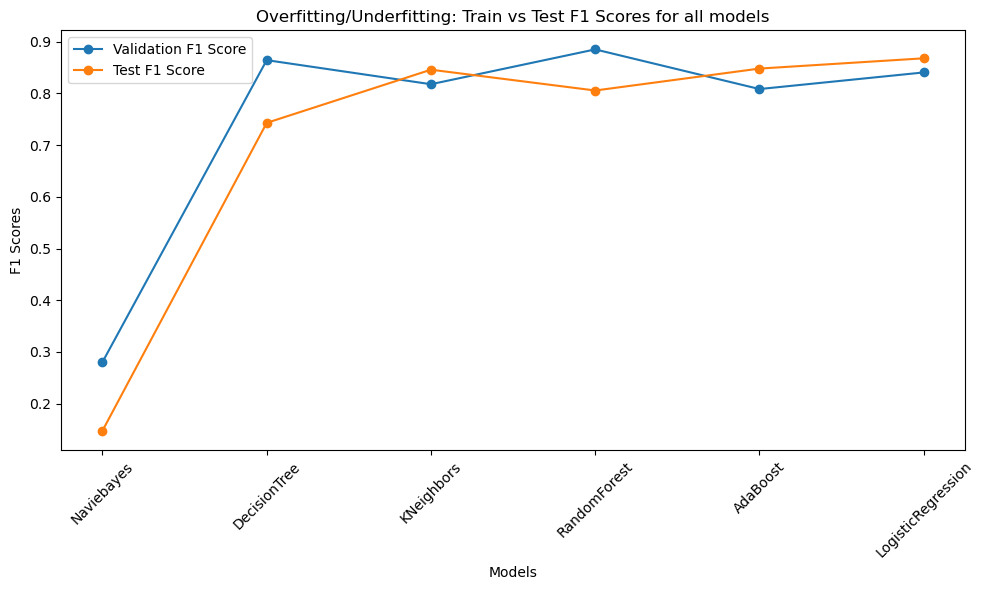

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting results for plotting
models_list = list(results.keys())
train_times = [results[model]['Train Time'] for model in models_list]
val_f1_scores = [results[model]['Val F1 Score'] for model in models_list]
test_f1_scores = [results[model]['Test F1 Score'] for model in models_list]

# Plot: Training Time comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=models_list, y=train_times)
plt.title('Model Training Time Comparison for all models')
plt.ylabel('Training Time (seconds)')
plt.xticks(rotation=45)
plt.show()

# Plot: F1 Scores Comparison (Training, Validation, Test)
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.25
index = range(len(models_list))

# Plot training F1 scores
ax.bar(index, val_f1_scores, bar_width, label='Validation F1 Score', color='b')
ax.bar([i + bar_width for i in index], test_f1_scores, bar_width, label='Test F1 Score', color='g')

ax.set_xlabel('Models')
ax.set_ylabel('F1 Scores')
ax.set_title('F1 Scores for Models')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(models_list, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

# Plot: Overfitting / Underfitting (Train vs Test F1 Scores)
plt.figure(figsize=(10, 6))
plt.plot(models_list, val_f1_scores, label='Validation F1 Score', marker='o')
plt.plot(models_list, test_f1_scores, label='Test F1 Score', marker='o')
plt.xlabel('Models')
plt.ylabel('F1 Scores')
plt.title('Overfitting/Underfitting: Train vs Test F1 Scores for all models')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# **Conclusion:**

After testing multiple models, **Logistic Regression** was the clear winner! Here's why:

1. **High Accuracy (86%)** 🎯: Best performance with minimal error, ideal for reliable predictions.
2. **No Overfitting** 🚫: It generalizes well, avoiding overfitting to the training data.
3. **Fast Training & Prediction** ⏱️: Quick enough for real-time applications without compromising on accuracy.
4. **Simplicity & Interpretability** 📊: Easy to understand and explain, making it transparent for decision-making.

### **Why Logistic Regression?**

- **Top Performance** 🏆: Best F1 scores, showing it's both precise and balanced.
- **Efficient & Scalable** 📈: Works well with large datasets and ensures speedy predictions.

Logistic Regression delivers the perfect balance of performance, speed, and simplicity, making it the best choice for deployment!
